## IML_Projet_6
Classez des images à l'aide d'algorithmes de Deep Learning

Ce note book contient : 
- Exploration des données

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!ls

drive  sample_data


In [3]:
!pwd

/content


In [4]:
cd /content/drive/My Drive/OpenClassRooms/IML_Projet_6/code/DeepLearningPictureDogs

/content/drive/My Drive/OpenClassRooms/IML_Projet_6/code/DeepLearningPictureDogs


In [5]:
!ls

01_OC_IML_Project_6_explorations.ipynb	README.md


## Import

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns
sns.set(color_codes=True, font_scale=1.33)

import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 25)

import scipy.io as sio

from PIL import Image
from PIL import ImageOps
from PIL import ImageFilter


## Definitions

In [0]:
path_data = '/content/drive/My Drive/OpenClassRooms/IML_Projet_6/data/'
path_file_list = 'lists/file_list.mat'
path_test_list = 'lists/test_list.mat'
path_train_list = 'lists/train_list.mat'
path_test_data = 'test_data.mat'
path_train_data = 'train_data.mat'

path_images_races = ['Images/n02085620-Chihuahua',
                     'Images/n02085782-Japanese_spaniel',
                     'Images/n02085936-Maltese_dog']

## Loading

In [0]:
mat_contents = sio.loadmat(path_data + path_file_list)

In [9]:
mat_contents.keys()

dict_keys(['__header__', '__version__', '__globals__', 'file_list', 'annotation_list', 'labels'])

In [10]:
np.unique(mat_contents['labels']).shape

(120,)

In [0]:
# test chargement image
# Charger l'image
img = \
Image.open("/content/drive/My Drive/OpenClassRooms/IML_Projet_6/data/Images/n02085620-Chihuahua/n02085620_1235.jpg") 

# Afficher l'image chargée
img.show()

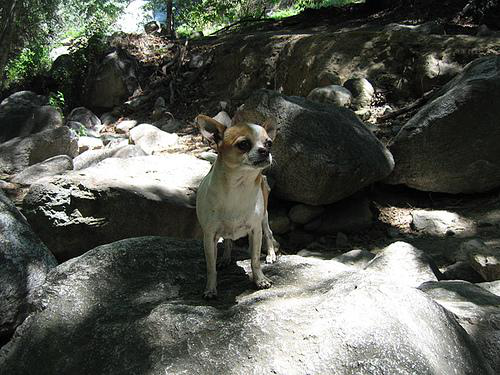

In [41]:
img

## Test traitements image

In [42]:
# Récupérer et afficher la taille de l'image (en pixels)
w, h = img.size
print("Largeur : {} px, hauteur : {} px".format(w, h))

Largeur : 500 px, hauteur : 375 px


In [43]:
# Afficher son mode de quantification
print("Format des pixels : {}".format(img.mode))

# Récupérer et afficher la valeur du pixel à une position précise
px_value = img.getpixel((20,100))
print("Valeur du pixel situé en (20,100) : {}".format(px_value))

Format des pixels : RGB
Valeur du pixel situé en (20,100) : (33, 37, 36)


In [44]:
# Récupérer les valeurs de tous les pixels sous forme d'une matrice
mat_img = np.array(img)
mat_img



array([[[40, 45, 38],
        [27, 32, 25],
        [32, 37, 30],
        ...,
        [25, 25, 25],
        [ 9,  9,  9],
        [ 4,  4,  4]],

       [[22, 27, 20],
        [22, 27, 20],
        [24, 29, 22],
        ...,
        [ 6,  6,  6],
        [ 0,  0,  0],
        [ 3,  3,  3]],

       [[24, 29, 22],
        [35, 40, 33],
        [32, 37, 30],
        ...,
        [ 7,  7,  7],
        [ 2,  2,  2],
        [ 4,  4,  4]],

       ...,

       [[28, 33, 29],
        [34, 39, 35],
        [21, 26, 22],
        ...,
        [28, 30, 27],
        [25, 27, 24],
        [27, 29, 26]],

       [[28, 33, 29],
        [31, 36, 32],
        [18, 23, 19],
        ...,
        [44, 46, 43],
        [41, 43, 40],
        [43, 45, 42]],

       [[26, 31, 27],
        [29, 34, 30],
        [17, 22, 18],
        ...,
        [44, 46, 41],
        [41, 43, 38],
        [42, 44, 39]]], dtype=uint8)

In [45]:
# Afficher la taille de la matrice de pixels
print("Taille de la matrice de pixels : {}".format(mat_img.shape))

Taille de la matrice de pixels : (375, 500, 3)


In [0]:
mat_img_r = mat_img[0:,0:,0]
mat_img_g = mat_img[0:,0:,1]
mat_img_b = mat_img[0:,0:,2]

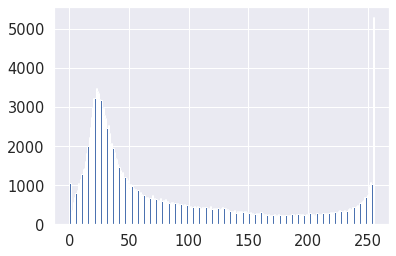

In [47]:
# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(mat_img_r.flatten(), bins=range(256))
plt.show()

In [0]:
img_autocontrast = ImageOps.autocontrast(img)

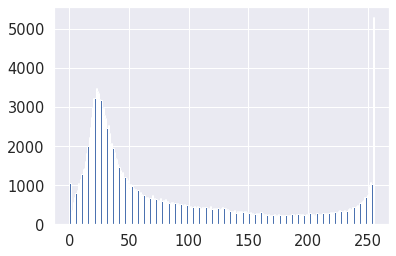

In [49]:
mat_img_autocontrast = np.array(img_autocontrast)
# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(mat_img_autocontrast[0:,0:,0].flatten(), bins=range(256))
plt.show()

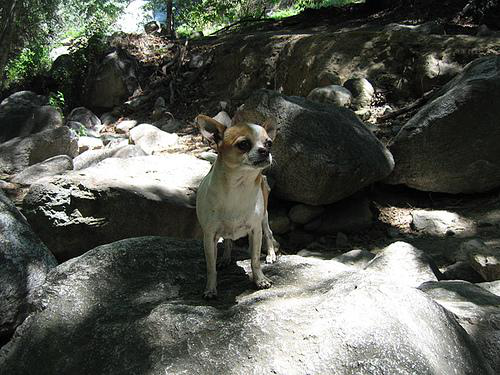

In [52]:
img_autocontrast

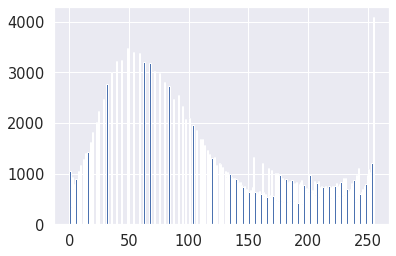

In [54]:

img_equalize = ImageOps.equalize(img)
mat_img_equalize = np.array(img_equalize)
# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(mat_img_equalize[0:,0:,0].flatten(), 
                            bins=range(256))
plt.show()

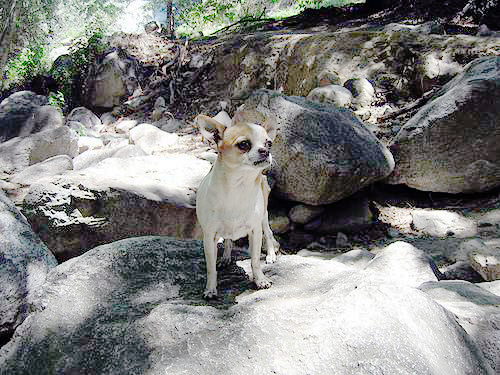

In [55]:
img_equalize

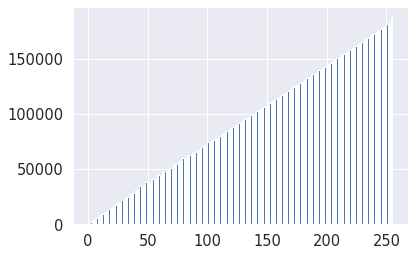

In [56]:
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(mat_img_equalize[0:,0:,0].flatten(), 
                            bins=range(256), cumulative=True)
plt.show()

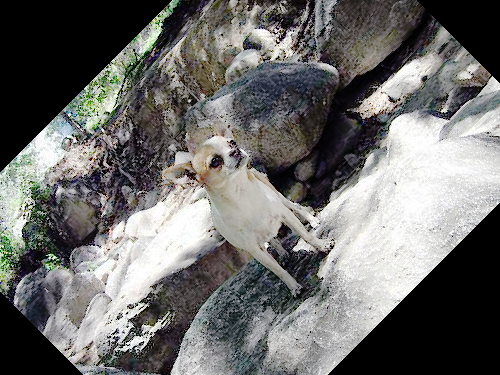

In [58]:
img_equalize.rotate(45, resample=0)

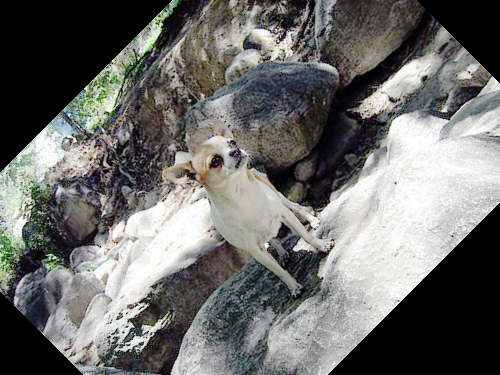

In [59]:
img_equalize.rotate(45, resample=Image.BILINEAR)

In [0]:
# Charger l'image sous forme d'une matrice de pixels
mat_img_equalize

# Générer le bruit gaussien de moyenne nulle et d'écart-type 7 (variance 49)
noise = np.random.normal(0, 7, mat_img_equalize[0:,0:,0].shape)
mat_img_equalize_noise = mat_img_equalize
mat_img_equalize_noise = mat_img_equalize_noise[0:,0:,0] + noise
# Créer l'image bruitée et l'afficher
noisy_img = Image.fromarray(mat_img_equalize_noise).convert('RGB')
noisy_img.show()

In [0]:
# Charger l'image sous forme d'une matrice de pixels
mat_img_equalize

# Générer le bruit gaussien de moyenne nulle et d'écart-type 7 (variance 49)
noise = np.random.normal(0, 7, mat_img_equalize[0:,0:,0].shape)
mat_img_equalize_noise = mat_img_equalize
mat_img_equalize_noise[0:,0:,0] = mat_img_equalize_noise[0:,0:,0] + noise
# Créer l'image bruitée et l'afficher
noisy_img = Image.fromarray(mat_img_equalize_noise).convert('RGB')
noisy_img.show()

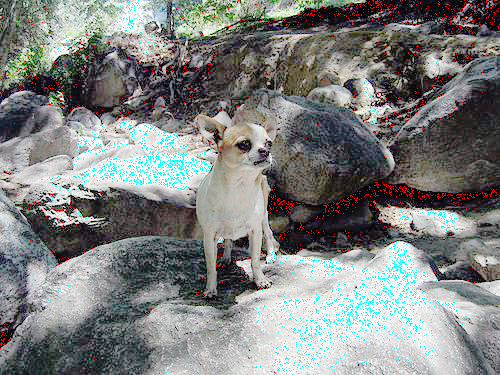

In [75]:
noisy_img

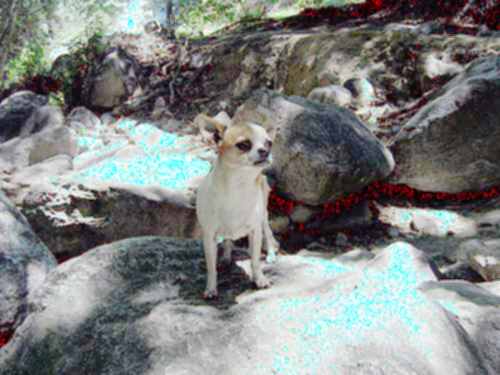

In [88]:
# Appliquer le lissage par moyennage (fenêtre de taille 9) et afficher le résultat
noisy_img_blurbox = noisy_img.filter(ImageFilter.BoxBlur(1))
noisy_img_blurbox

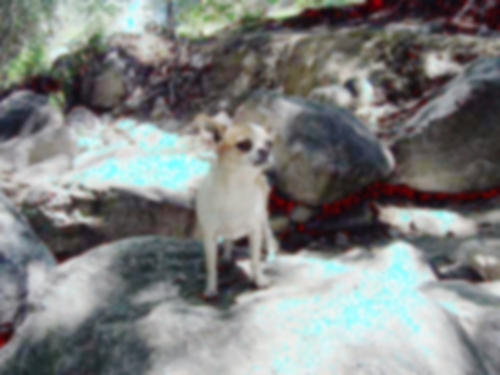

In [91]:
# GaussianBlur(radius)
noisy_img_GaussianBlur = noisy_img.filter(ImageFilter.GaussianBlur(2))
noisy_img_GaussianBlur

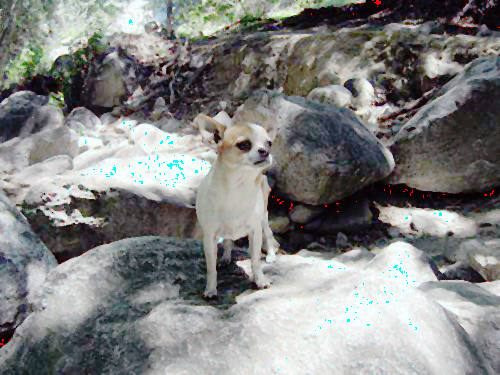

In [96]:
# MedianFilter
noisy_img_Median = noisy_img.filter(ImageFilter.MedianFilter(size=3))
noisy_img_Median